In [2]:
import math 
from collections import Counter, defaultdict  
from functools import partial

import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report, accuracy_score, \
                            recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

plt.style.use("fivethirtyeight")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dfed = pd.read_csv("/content/drive/MyDrive/Project/ED Real Data/RawData2019csv_CLEANEDfix.csv")

In [5]:
dfed

,JENIS_KELAMIN,UMUR,RAWAT,RUJUK?,PULANG?,DOR?,DOA?,CARDIAC_ARREST?,CHEST_PAIN?,ABDOMINAL_PAIN?,...,KECELAKAAN_LL?,VERTIGO?,VL?,VE?,HT?,VOMITUS?,DM?,KASUS,KONSUL_SPESIALIS?,TRIASE
0,L,19.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,YES,NaN,NaN,NaN,NaN,bedah,NaN,5.0
1,L,53.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,5.0
2,L,22.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bedah,NaN,3.0
3,P,20.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,4.0
4,L,44.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,L,18.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,umum,NaN,5.0
16209,L,47.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dalam,NaN,5.0
16210,L,11.0,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anak,NaN,4.0
16211,P,17.0,NaN,NaN,YES,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bedah,NaN,5.0


In [6]:
dfed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JENIS_KELAMIN            16197 non-null  object 
 1   UMUR                     16145 non-null  float64
 2   RAWAT                    12769 non-null  object 
 3   RUJUK?                   147 non-null    object 
 4   PULANG?                  3265 non-null   object 
 5   DOR?                     111 non-null    object 
 6   DOA?                     18 non-null     object 
 7   CARDIAC_ARREST?          75 non-null     object 
 8   CHEST_PAIN?              199 non-null    object 
 9   ABDOMINAL_PAIN?          929 non-null    object 
 10  EPIGASTRIC_PAIN?         39 non-null     object 
 11  KEJANG?                  235 non-null    object 
 12  DEMAM?                   3737 non-null   object 
 13  ASTHMA?                  307 non-null    object 
 14  MCU?                  

In [7]:
dfed.isna().sum()

JENIS_KELAMIN                 16
UMUR                          68
RAWAT                       3444
RUJUK?                     16066
PULANG?                    12948
DOR?                       16102
DOA?                       16195
CARDIAC_ARREST?            16138
CHEST_PAIN?                16014
ABDOMINAL_PAIN?            15284
EPIGASTRIC_PAIN?           16174
KEJANG?                    15978
DEMAM?                     12476
ASTHMA?                    15906
MCU?                       15734
CEDERA_KEPALA              15810
PENURUNAN_KESADARAN?       16015
CHRONIC_KIDNEY_DISEASE?    15987
KECELAKAAN_LL?             16010
VERTIGO?                   15756
VL?                        15764
VE?                        15962
HT?                        15657
VOMITUS?                   15306
DM?                        15795
KASUS                         80
KONSUL_SPESIALIS?          12235
TRIASE                        28
dtype: int64

In [8]:
dfed['JENIS_KELAMIN'].fillna('UNKNOWN',inplace=True)
mean=dfed['UMUR'].mean()
dfed['UMUR'].fillna(mean,inplace=True)
dfed['RAWAT'].fillna('NO',inplace=True)
dfed['RUJUK?'].fillna('NO',inplace=True)
dfed['PULANG?'].fillna('NO',inplace=True)
dfed['DOR?'].fillna('NO',inplace=True)
dfed['DOA?'].fillna('NO',inplace=True)
dfed['CARDIAC_ARREST?'].fillna('NO',inplace=True)
dfed['CHEST_PAIN?'].fillna('NO',inplace=True)
dfed['ABDOMINAL_PAIN?'].fillna('NO',inplace=True)
dfed['EPIGASTRIC_PAIN?'].fillna('NO',inplace=True)
dfed['KEJANG?'].fillna('NO',inplace=True)
dfed['DEMAM?'].fillna('NO',inplace=True)
dfed['ASTHMA?'].fillna('NO',inplace=True)
dfed['MCU?'].fillna('NO',inplace=True)
dfed['CEDERA_KEPALA'].fillna('NO',inplace=True)
dfed['PENURUNAN_KESADARAN?'].fillna('NO',inplace=True)
dfed['CHRONIC_KIDNEY_DISEASE?'].fillna('NO',inplace=True)
dfed['KECELAKAAN_LL?'].fillna('NO',inplace=True)
dfed['VERTIGO?'].fillna('NO',inplace=True)
dfed['VL?'].fillna('NO',inplace=True)
dfed['VE?'].fillna('NO',inplace=True)
dfed['HT?'].fillna('NO',inplace=True)
dfed['VOMITUS?'].fillna('NO',inplace=True)
dfed['DM?'].fillna('NO',inplace=True)
dfed['KASUS'].fillna('UNKNOWN',inplace=True)
dfed['KONSUL_SPESIALIS?'].fillna('NO',inplace=True)
dfed['TRIASE'].fillna(5,inplace=True)
dfed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16213 entries, 0 to 16212
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   JENIS_KELAMIN            16213 non-null  object 
 1   UMUR                     16213 non-null  float64
 2   RAWAT                    16213 non-null  object 
 3   RUJUK?                   16213 non-null  object 
 4   PULANG?                  16213 non-null  object 
 5   DOR?                     16213 non-null  object 
 6   DOA?                     16213 non-null  object 
 7   CARDIAC_ARREST?          16213 non-null  object 
 8   CHEST_PAIN?              16213 non-null  object 
 9   ABDOMINAL_PAIN?          16213 non-null  object 
 10  EPIGASTRIC_PAIN?         16213 non-null  object 
 11  KEJANG?                  16213 non-null  object 
 12  DEMAM?                   16213 non-null  object 
 13  ASTHMA?                  16213 non-null  object 
 14  MCU?                  

In [9]:
num=dfed.select_dtypes(include='number').columns.tolist()
cat=dfed.select_dtypes(include='object').columns.tolist()
print(num)
print(cat)

['UMUR', 'TRIASE']
['JENIS_KELAMIN', 'RAWAT', 'RUJUK?', 'PULANG?', 'DOR?', 'DOA?', 'CARDIAC_ARREST?', 'CHEST_PAIN?', 'ABDOMINAL_PAIN?', 'EPIGASTRIC_PAIN?', 'KEJANG?', 'DEMAM?', 'ASTHMA?', 'MCU?', 'CEDERA_KEPALA', 'PENURUNAN_KESADARAN?', 'CHRONIC_KIDNEY_DISEASE?', 'KECELAKAAN_LL?', 'VERTIGO?', 'VL?', 'VE?', 'HT?', 'VOMITUS?', 'DM?', 'KASUS', 'KONSUL_SPESIALIS?']


In [10]:
dfed[num].describe().T

,count,mean,std,min,25%,50%,75%,max
UMUR,16213.0,34.753415,23.156746,0.0,18.0,30.0,55.0,287.0
TRIASE,16213.0,4.052735,0.625843,1.0,4.0,4.0,4.0,5.0


In [11]:
dfed[cat].describe().T

,count,unique,top,freq
JENIS_KELAMIN,16213,3,P,8142
RAWAT,16213,2,YES,12769
RUJUK?,16213,2,NO,16066
PULANG?,16213,2,NO,12948
DOR?,16213,2,NO,16102
DOA?,16213,2,NO,16195
CARDIAC_ARREST?,16213,2,NO,16138
CHEST_PAIN?,16213,2,NO,16014
ABDOMINAL_PAIN?,16213,2,NO,15284
EPIGASTRIC_PAIN?,16213,2,NO,16174


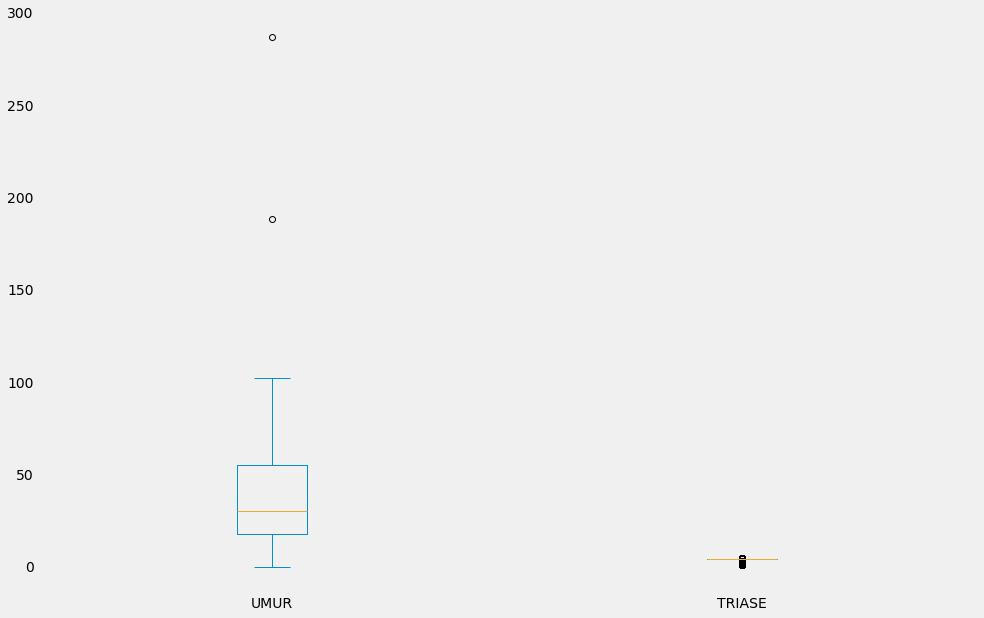

In [12]:
dfed[num].plot(kind='box',figsize=(15,10))
plt.grid(False)
plt.show()

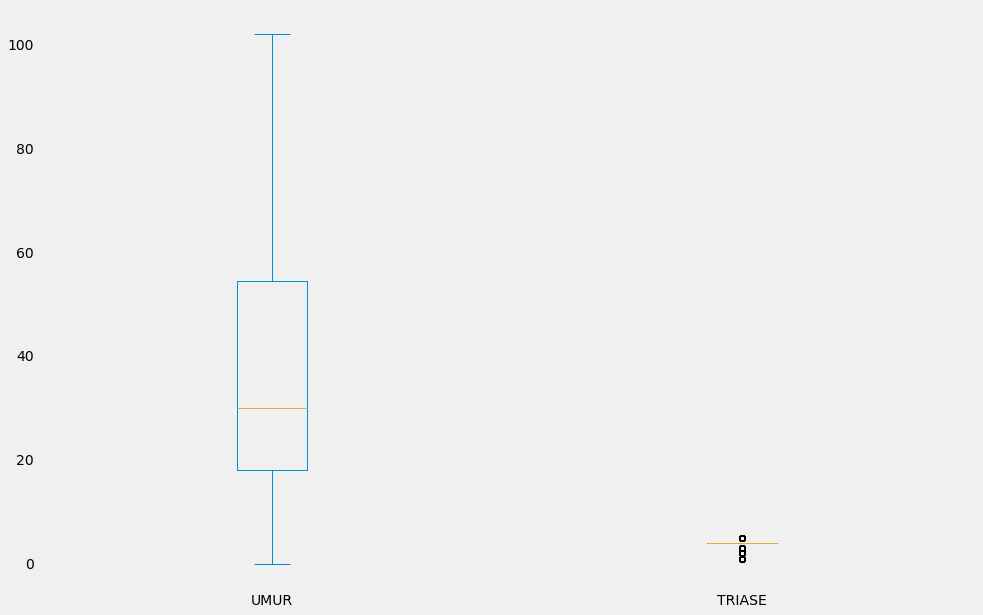

In [13]:
q1=dfed[['UMUR']].quantile(0.25)
q3=dfed[['UMUR']].quantile(0.75)
IQR=q3-q1
max=q3+1.5*IQR
indexOutlier=dfed[dfed['UMUR']>float(max)].index
dfed.drop(indexOutlier,inplace=True)
dfed[num].plot(kind='box',figsize=(15,10))
plt.grid(False)
plt.show()

In [14]:
dfed[num].describe().T

,count,mean,std,min,25%,50%,75%,max
UMUR,16211.0,34.728402,23.041840,0.0,18.0,30.0,54.5,102.0
TRIASE,16211.0,4.052619,0.625793,1.0,4.0,4.0,4.0,5.0


In [15]:
dfed[cat].describe().T

,count,unique,top,freq
JENIS_KELAMIN,16211,3,P,8142
RAWAT,16211,2,YES,12769
RUJUK?,16211,2,NO,16064
PULANG?,16211,2,NO,12948
DOR?,16211,2,NO,16100
DOA?,16211,2,NO,16193
CARDIAC_ARREST?,16211,2,NO,16136
CHEST_PAIN?,16211,2,NO,16012
ABDOMINAL_PAIN?,16211,2,NO,15282
EPIGASTRIC_PAIN?,16211,2,NO,16172


In [16]:
x=dfed.drop(columns=['TRIASE']).copy()
y=dfed['TRIASE'].copy()

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,stratify=y,random_state=11)

print(f'training size: {xtrain.shape[0]} ({100*xtrain.shape[0]/x.shape[0]:.2f}%)')
print(f'test size: {xtest.shape[0]} ({100*xtest.shape[0]/x.shape[0]:.2f}%)')

training size: 12968 (80.00%)
test size: 3243 (20.00%)


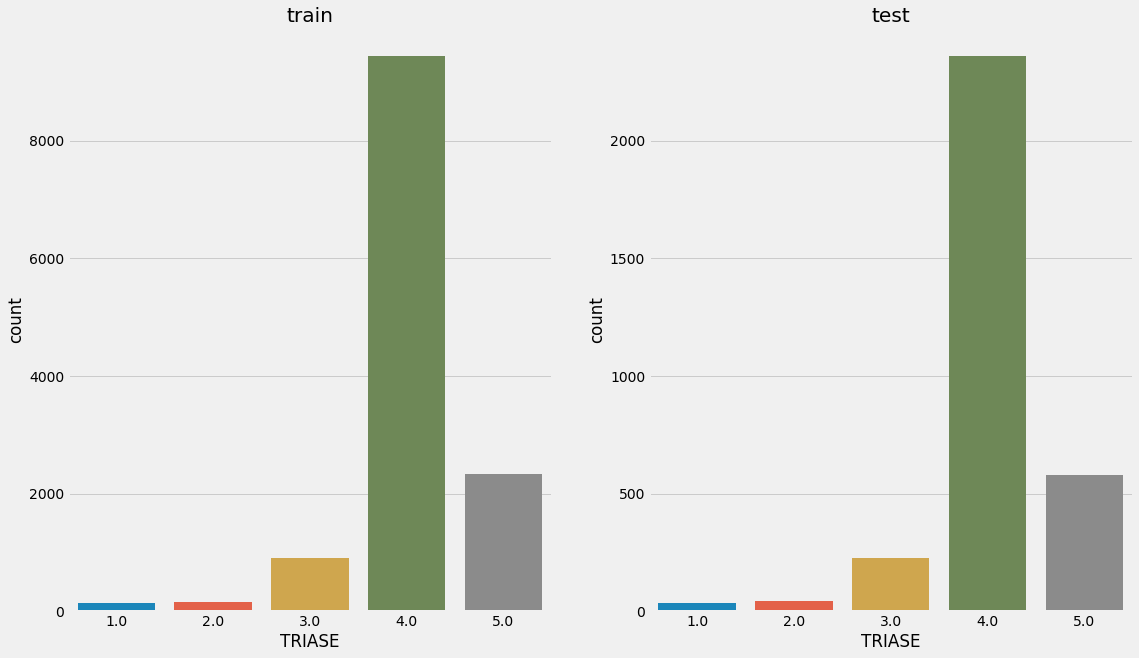

In [18]:
fig,axis=plt.subplots(1,2,figsize=(17,10))
for i,label in enumerate([(ytrain,'train'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [19]:
print("Before oversampling: ", Counter(ytrain))

Before oversampling:  Counter({4.0: 9439, 5.0: 2325, 3.0: 903, 2.0: 165, 1.0: 136})


In [20]:
oversample=RandomOverSampler(sampling_strategy='not majority')

In [21]:
xtrain_ov,ytrain_ov=oversample.fit_resample(xtrain,ytrain)

In [22]:
print("After oversampling: ", Counter(ytrain_ov))

After oversampling:  Counter({4.0: 9439, 1.0: 9439, 5.0: 9439, 3.0: 9439, 2.0: 9439})


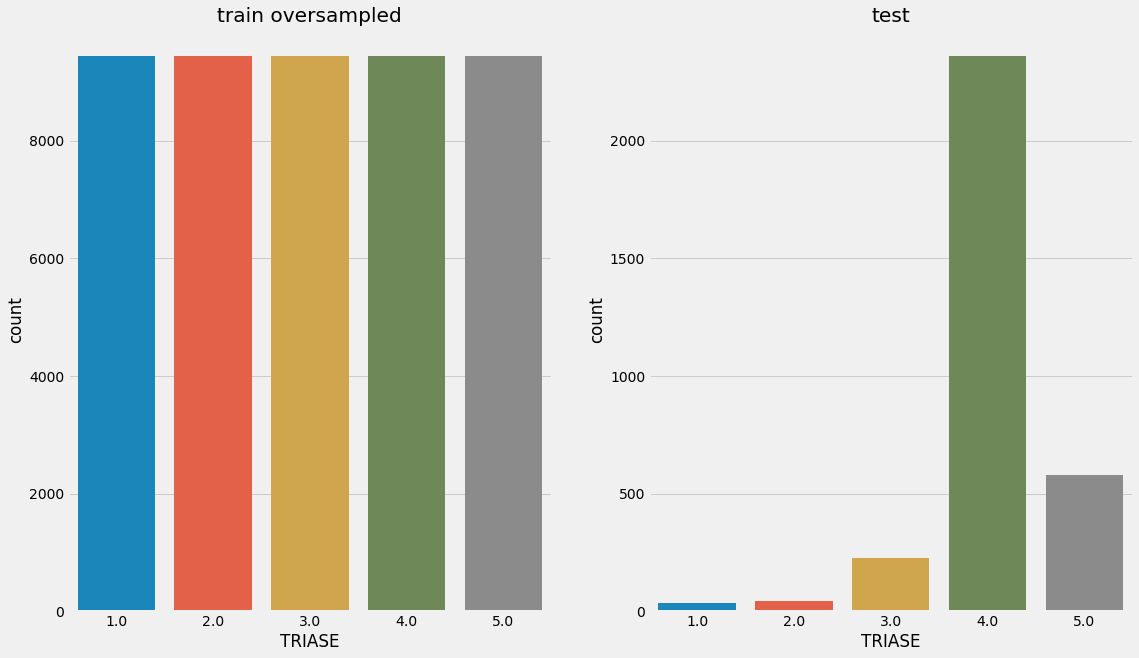

In [23]:
fig,axis=plt.subplots(1,2,figsize=(17,10))
for i,label in enumerate([(ytrain_ov,'train oversampled'),(ytest,'test')]):
  sns.countplot(x=label[0],ax=axis[i])
  axis[i].set_title(label[1])
plt.show()

In [24]:
nomfeat=['JENIS_KELAMIN',
         'RAWAT','RUJUK?','PULANG?',
         'DOR?','DOA?','CARDIAC_ARREST?',
         'CHEST_PAIN?','ABDOMINAL_PAIN?','EPIGASTRIC_PAIN?','KEJANG?','DEMAM?','ASTHMA?',
         'MCU?','PENURUNAN_KESADARAN?','CHRONIC_KIDNEY_DISEASE?',
         'KECELAKAAN_LL?','VERTIGO?','VL?','VE?','HT?','VOMITUS?','DM?']
orfeat=x.select_dtypes(include='object').drop(columns=nomfeat).columns.tolist()
print(nomfeat)
print(orfeat)

['JENIS_KELAMIN', 'RAWAT', 'RUJUK?', 'PULANG?', 'DOR?', 'DOA?', 'CARDIAC_ARREST?', 'CHEST_PAIN?', 'ABDOMINAL_PAIN?', 'EPIGASTRIC_PAIN?', 'KEJANG?', 'DEMAM?', 'ASTHMA?', 'MCU?', 'PENURUNAN_KESADARAN?', 'CHRONIC_KIDNEY_DISEASE?', 'KECELAKAAN_LL?', 'VERTIGO?', 'VL?', 'VE?', 'HT?', 'VOMITUS?', 'DM?']
['CEDERA_KEPALA', 'KASUS', 'KONSUL_SPESIALIS?']


In [25]:
onehot=OneHotEncoder()
onehot.fit(xtrain_ov[nomfeat])
xtrain_oh=pd.DataFrame(onehot.transform(xtrain_ov[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
xtest_oh=pd.DataFrame(onehot.transform(xtest[nomfeat]).toarray(),columns=onehot.get_feature_names_out())
display(xtrain_oh)

ordinal=OrdinalEncoder()
ordinal.fit(xtrain_ov[orfeat])
xtrain_or=pd.DataFrame(ordinal.transform(xtrain_ov[orfeat]),columns=ordinal.feature_names_in_)
xtest_or=pd.DataFrame(ordinal.transform(xtest[orfeat]),columns=ordinal.feature_names_in_)
display(xtrain_or)

,JENIS_KELAMIN_L,JENIS_KELAMIN_P,JENIS_KELAMIN_UNKNOWN,RAWAT_NO,RAWAT_YES,RUJUK?_NO,RUJUK?_YES,PULANG?_NO,PULANG?_YES,DOR?_NO,...,VL?_NO,VL?_YES,VE?_NO,VE?_YES,HT?_NO,HT?_YES,VOMITUS?_NO,VOMITUS?_YES,DM?_NO,DM?_YES
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47190,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47191,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47192,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
47193,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


,CEDERA_KEPALA,KASUS,KONSUL_SPESIALIS?
0,1.0,8.0,0.0
1,3.0,9.0,0.0
2,3.0,7.0,1.0
3,3.0,22.0,0.0
4,3.0,20.0,1.0
...,...,...,...
47190,3.0,9.0,0.0
47191,3.0,7.0,0.0
47192,3.0,7.0,0.0
47193,3.0,9.0,0.0


In [26]:
xtrain_comb=pd.concat([xtrain_ov['UMUR'].reset_index(drop=True),xtrain_oh,xtrain_or],axis=1)
xtest_comb=pd.concat([xtest['UMUR'].reset_index(drop=True),xtest_oh,xtest_or],axis=1)
xtrain_comb

,UMUR,JENIS_KELAMIN_L,JENIS_KELAMIN_P,JENIS_KELAMIN_UNKNOWN,RAWAT_NO,RAWAT_YES,RUJUK?_NO,RUJUK?_YES,PULANG?_NO,PULANG?_YES,...,VE?_YES,HT?_NO,HT?_YES,VOMITUS?_NO,VOMITUS?_YES,DM?_NO,DM?_YES,CEDERA_KEPALA,KASUS,KONSUL_SPESIALIS?
0,23.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0,0.0
1,29.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0
2,6.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,7.0,1.0
3,51.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,22.0,0.0
4,59.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47190,35.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0
47191,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,7.0,0.0
47192,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,7.0,0.0
47193,26.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,9.0,0.0


In [27]:
model=RandomForestClassifier()

In [28]:
model.fit(xtrain_comb,ytrain_ov)

RandomForestClassifier()

In [29]:
pred_train=model.predict(xtrain_comb)
pred_test=model.predict(xtest_comb)

In [30]:
print('Classification Report Train Data RF')
print(classification_report(ytrain_ov,pred_train))
print('Classification Report Test Data RF')
print(classification_report(ytest,pred_test))

Classification Report Train Data RF
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      9439
         2.0       0.95      0.99      0.97      9439
         3.0       0.94      0.95      0.94      9439
         4.0       0.99      0.95      0.97      9439
         5.0       0.99      0.98      0.99      9439

    accuracy                           0.97     47195
   macro avg       0.97      0.97      0.97     47195
weighted avg       0.97      0.97      0.97     47195

Classification Report Test Data RF
              precision    recall  f1-score   support

         1.0       0.57      0.62      0.59        34
         2.0       0.16      0.21      0.19        42
         3.0       0.39      0.53      0.45       226
         4.0       0.97      0.93      0.95      2360
         5.0       0.93      0.93      0.93       581

    accuracy                           0.89      3243
   macro avg       0.60      0.64      0.62      3243
weight

Confusion Matrix Train Data RF


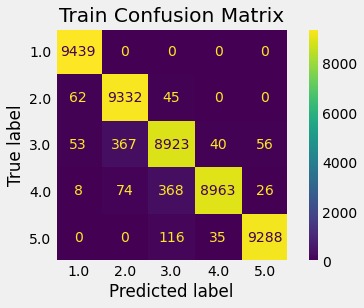

Confusion Matrix Test Data RF


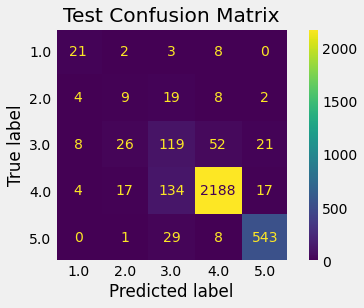

In [31]:
print('Confusion Matrix Train Data RF')
ConfusionMatrixDisplay.from_predictions(ytrain_ov, pred_train)
plt.title("Train Confusion Matrix")
plt.grid(False)
plt.show()

print('Confusion Matrix Test Data RF')
ConfusionMatrixDisplay.from_predictions(ytest, pred_test)
plt.title("Test Confusion Matrix")
plt.grid(False)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
#bootstrap_range=list([True])
#oob_score_range=list([True,False])
#max_samples_range=np.arange(100,701,100)
#class_weight_range=list(['balanced','balanced_subsample'])
#warm_start_range=list([True,False])
n_estimators_range=np.arange(500,1001,100)
criterion_range=list(['gini','entropy'])
#min_samples_split_range=list([2,10,50])
#min_samples_leaf_range=list([1,10,20])
#max_features_range=list([2,3])
max_features_range=list([0.2,0.5,0.6,'sqrt','log2'])
#max_depth_range=list([10,20,30,40,50,60])
max_depth_range=list([40])
param_grid = dict(#bootstrap=bootstrap_range,
                  #oob_score=oob_score_range,
                  #max_samples=max_samples_range,
                  #class_weight=class_weight_range,
                  #warm_start=warm_start_range,
                  n_estimators=n_estimators_range,
                  criterion=criterion_range,
                  #min_samples_split=min_samples_split_range,
                  #min_samples_leaf=min_samples_leaf_range,
                  max_features=max_features_range,
                  max_depth=max_depth_range)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [34]:
grid.fit(xtrain_comb,ytrain_ov)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [40],
                         'max_features': [0.2, 0.5, 0.6, 'sqrt', 'log2'],
                         'n_estimators': array([ 500,  600,  700,  800,  900, 1000])})

In [35]:
print("The best parameters are %s with a score of %0.4f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2', 'n_estimators': 900} with a score of 0.9672


In [45]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results

,criterion,max_depth,max_features,n_estimators,Accuracy
0,gini,40,0.2,500,0.966903
1,gini,40,0.2,600,0.966988
2,gini,40,0.2,700,0.966988
3,gini,40,0.2,800,0.966861
4,gini,40,0.2,900,0.966861
5,gini,40,0.2,1000,0.966882
6,gini,40,0.5,500,0.966310
7,gini,40,0.5,600,0.966458
8,gini,40,0.5,700,0.966395
9,gini,40,0.5,800,0.966352


In [46]:
pd.set_option('max_rows',10)
grid_results

,criterion,max_depth,max_features,n_estimators,Accuracy
0,gini,40,0.2,500,0.966903
1,gini,40,0.2,600,0.966988
2,gini,40,0.2,700,0.966988
3,gini,40,0.2,800,0.966861
4,gini,40,0.2,900,0.966861
...,...,...,...,...,...
55,entropy,40,log2,600,0.967115
56,entropy,40,log2,700,0.967094
57,entropy,40,log2,800,0.967179
58,entropy,40,log2,900,0.967242


In [38]:
model_tuned1=RandomForestClassifier(n_estimators=900, criterion='entropy', max_features='log2', max_depth=40)

In [ ]:
model_tuned=RandomForestClassifier(max_depth=40, max_features=3, n_estimators=200)

In [39]:
model_tuned1.fit(xtrain_comb,ytrain_ov)

RandomForestClassifier(criterion='entropy', max_depth=40, max_features='log2',
                       n_estimators=900)

In [40]:
pred_train=model_tuned1.predict(xtrain_comb)
pred_test=model_tuned1.predict(xtest_comb)

Classification Report Train Data RF after being tuned
              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99      9439
         2.0       0.96      0.98      0.97      9439
         3.0       0.94      0.95      0.94      9439
         4.0       0.99      0.95      0.97      9439
         5.0       0.99      0.98      0.99      9439

    accuracy                           0.97     47195
   macro avg       0.97      0.97      0.97     47195
weighted avg       0.97      0.97      0.97     47195

Confusion Matrix Train Data RF after being tuned


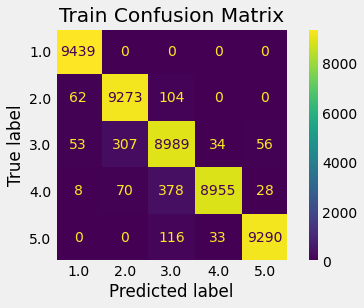

In [42]:
print('Classification Report Train Data RF after being tuned')
print(classification_report(ytrain_ov,pred_train))
print('Confusion Matrix Train Data RF after being tuned')
ConfusionMatrixDisplay.from_predictions(ytrain_ov, pred_train)
plt.title("Train Confusion Matrix")
plt.grid(False)
plt.show()

Classification Report Test Data RF after being tuned
              precision    recall  f1-score   support

         1.0       0.54      0.56      0.55        34
         2.0       0.15      0.19      0.17        42
         3.0       0.40      0.54      0.46       226
         4.0       0.97      0.93      0.95      2360
         5.0       0.93      0.93      0.93       581

    accuracy                           0.89      3243
   macro avg       0.60      0.63      0.61      3243
weighted avg       0.90      0.89      0.90      3243

Confusion Matrix Test Data RF after being tuned


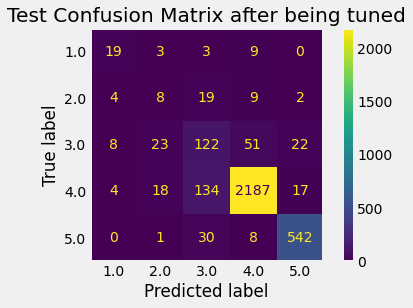

In [41]:
print('Classification Report Test Data RF after being tuned')
print(classification_report(ytest,pred_test))
print('Confusion Matrix Test Data RF after being tuned')
ConfusionMatrixDisplay.from_predictions(ytest, pred_test)
plt.title("Test Confusion Matrix after being tuned")
plt.grid(False)
plt.show()